# 0710012 何權祐 HW4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import re
from io import StringIO

%matplotlib inline

# Data Generation

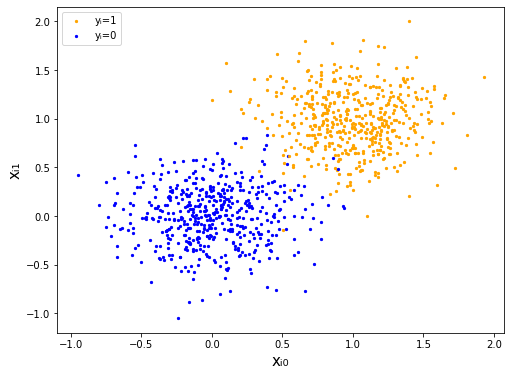

In [2]:
plt.figure(figsize = (8,6))
x=[0,0]
x[0] = np.zeros(1000)
x[1] = np.zeros(1000)
y = 1*(np.random.normal(0, 1, 1000) > 0)
cov = [[0.1, 0], [0, 0.1]]
for i in range(1000):
    if y[i]:
        x[0][i], x[1][i] = np.random.multivariate_normal([1,1], cov)
        blue=plt.scatter(x[0][i],x[1][i],c='orange',s=5)
    else:
        x[0][i], x[1][i] = np.random.multivariate_normal([0,0], cov)
        orange=plt.scatter(x[0][i],x[1][i],c='blue',s=5)
plt.legend((blue, orange),('yᵢ=1','yᵢ=0'),loc='upper left')
plt.xlabel('xᵢ₀', fontdict={'size':15})
plt.ylabel('xᵢ₁', fontdict={'size':15})
plt.show()

# Model Construction

In [3]:
from sklearn.linear_model import LogisticRegression
# print(y.shape)
clf = LogisticRegression()
clf.fit(np.asanyarray(x).transpose(), y)
# print(clf.coef_)
# print(clf.intercept_)
coef1 = clf.coef_[0][0]
coef2 = clf.coef_[0][1]
intercept = clf.intercept_[0]
# print(coef1, coef2, intercept)

# Result

In [4]:
correct=0
for i in range(1000):
    ans=x[0][i]*coef1+x[1][i]*coef2+intercept
    if (y[i]==1 and ans>0) or (y[i]==0 and ans<0):
        correct+=1
print('Accuracy:')
print(str(round(correct/1000*100,2))+'%\n')
# print(x[0])
print('Model Weights & Corresponded Terms:')
print('yᵢ=L('+str(round(intercept,2))+' + '+str(round(coef1,2))+'*xᵢ₀ + '+str(round(coef2,2))+'*xᵢ₁)')

Accuracy:
98.5%

Model Weights & Corresponded Terms:
yᵢ=L(-5.24 + 5.11*xᵢ₀ + 5.16*xᵢ₁)


# Result plot

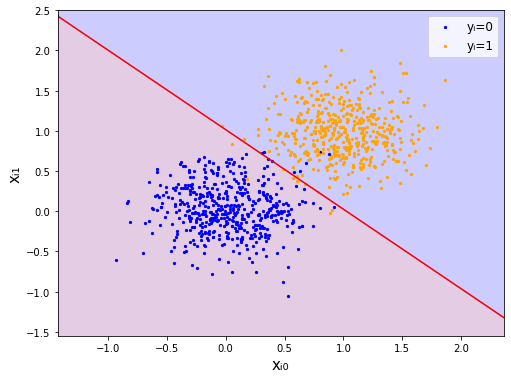

In [5]:
x_label = np.linspace(min(x[0])-1,max(x[0])+1,100)

line = -coef1/coef2*x_label - intercept/coef2

plt.figure(figsize = (8,6))
plt.plot(x_label, line, '-r')
plt.fill_between(x_label, line,max(x[1])+1, color='blue', alpha=0.2)
plt.fill_between(x_label, line,min(x[1])-1, color='purple', alpha=0.2)
for i in range(1000):
    if y[i]:
        x[0][i], x[1][i] = np.random.multivariate_normal([1,1], cov)
        blue=plt.scatter(x[0][i],x[1][i],c='orange',s=5)
    else:
        x[0][i], x[1][i] = np.random.multivariate_normal([0,0], cov)
        orange=plt.scatter(x[0][i],x[1][i],c='blue',s=5)
plt.legend((orange, blue),('yᵢ=0','yᵢ=1'),loc='upper right',prop={'size': 12})
plt.xlim([min(x[0])-0.5, max(x[0])+0.5])
plt.ylim([min(x[1])-0.5, max(x[1])+0.5])
plt.xlabel('xᵢ₀', fontdict={'size':15})
plt.ylabel('xᵢ₁', fontdict={'size':15})
plt.show()